In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline


In [3]:
path = "..\Dataset\API_Kaggle\Salary_dataset.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
df.describe()


,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


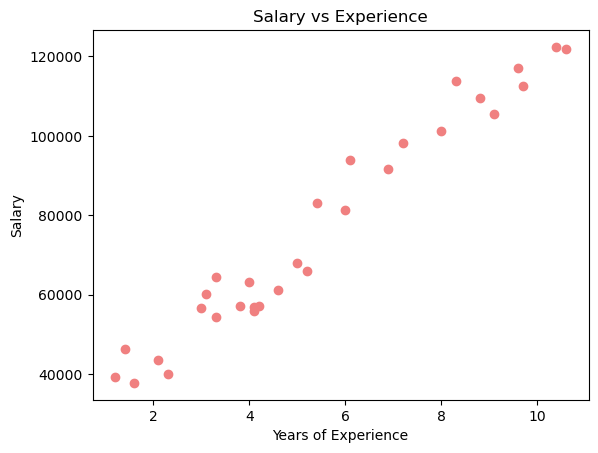

In [5]:
#Data Visualization
#melihat hubungan linearitas fitur
#dengan diagram visualisasi
plt.scatter(df['YearsExperience'], df['Salary'], color='lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [6]:
df.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [9]:
X = df.iloc[:,:1]
y = df.iloc[:,1:]

In [10]:
#Membagi dataset menjadi data latih dan data uji
#dengan perbandingan 70% : 30%

from pandas.core.common import random_state
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print ("Ukuran X_trainset = ", X_train.shape)
print ("Ukuran y_trainset = ", y_train.shape)

print ("Ukuran X_testset = ", X_test.shape)
print ("Ukuran y_testset = ", y_test.shape)

Ukuran X_trainset =  (21, 1)
Ukuran y_trainset =  (21, 1)
Ukuran X_testset =  (9, 1)
Ukuran y_testset =  (9, 1)


In [11]:
#Data Classification
#Membangun model regresi linier sederhana
#https://scikit-learn.org/stable/modules/generated/sklearn. linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

#Melatih model dengan data latih
regressor.fit(X_train, y_train)

#Memprediksi data uji dengan model
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

hasil = {
"YearsExperience": X_test.values. flatten(),
"ActualSalary": y_test.values.flatten(),
"PredictedSalary": y_pred_test.flatten(),

#memprediksi nilai y_test
#memprediksi nilai y_train

}

#load data into a DataFrame object:
dfhasil = pd.DataFrame(hasil)
dfhasil

,YearsExperience,ActualSalary,PredictedSalary
0,1.6,37732.0,40818.783270
1,10.4,122392.0,123189.082589
2,4.2,57082.0,65155.462615
3,4.0,63219.0,63283.410357
4,9.6,116970.0,115700.873560
5,8.8,109432.0,108212.664531
6,9.7,112636.0,116636.899689
7,4.1,55795.0,64219.436486
8,5.4,83089.0,76387.776158


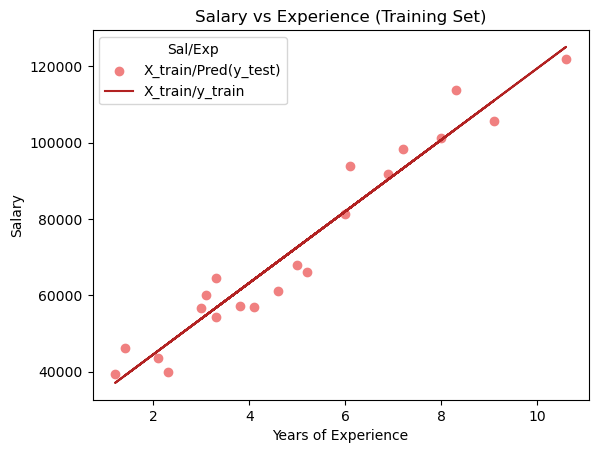

In [12]:
#Visualisasi prediksi pada data latih
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
#plt.box(False)
plt.show()

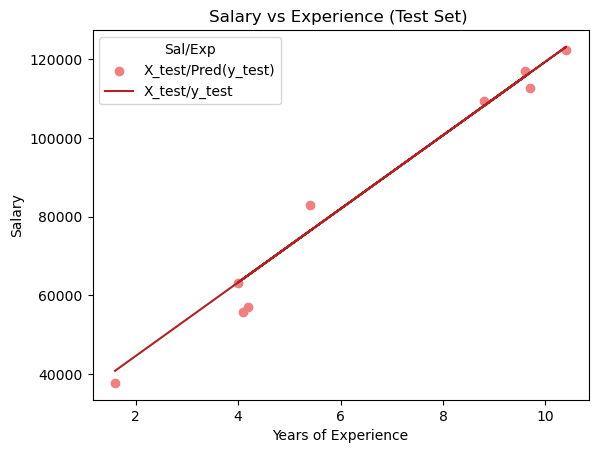

In [13]:
#visualisasi prediksi pada data uji
plt.scatter(X_test, y_test, color = 'lightcoral' )
plt.plot(X_test, y_pred_test, color = 'firebrick')
plt. title('Salary vs Experience (Test Set) ')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt. legend( ['X_test/Pred(y_test)', 'X_test/y_test'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.show()

In [14]:
print(f'Model Coefficient: {regressor.coef_[0][0]}')
print(f'Model Intercept: {regressor.intercept_[0]}')

Model Coefficient: 9360.261286193658
Model Intercept: 25842.365212578254


In [16]:
#Model Evaluation
#mengevaluasi model regresi dengan metriks:
#MAE, MSE, RMSE dan R Squared Score

# Pengguaan function .squeeze() untuk mengubah dataframe (2D) menjadi bentuk 1D

mae = np.mean(np.absolute(y_pred_test - y_test))
epsilon = np.finfo(float).eps # agar tidak ada pembagian dengan nol
mape = np.mean(np.abs((y_test.squeeze() - y_pred_test.squeeze()) /
np.maximum(epsilon, np.abs(y_test.squeeze())))) * 100
mse = np.mean((y_pred_test - y_test) ** 2)
rmse = np.sqrt(mse)
rss = np.sum((y_pred_test.squeeze() - y_test.squeeze()) ** 2)
tss = np.sum((y_test.squeeze() -np.mean(y_test)) ** 2)
r_squared = 1 - (rss/tss)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:,.2f}%")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"Residual Sum of Squares (RSS): {rss:,.2f}")
print(f"Total Sum of Squares (TSS): {tss:,.2f}")
print(f"R squared score: {r_squared:.2f}")

Mean Absolute Error (MAE): 3,737.42
Mean Absolute Percentage Error (MAPE): 5.78%
Mean Squared Error (MSE): 23,370,078.80
Root Mean Squared Error (RMSE): 4,834.26
Residual Sum of Squares (RSS): 210,330,709.21
Total Sum of Squares (TSS): 8,120,670,093.56
R squared score: 0.97


In [17]:
#Model Evaluation
#mengevaluasi model regresi dengan metriks:
#MAE, MSE, RMSE dan R Squared Score dengan function

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_test)
mape = mean_absolute_percentage_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred_test)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAE): {mape*100:,.2f}%")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R squared score: {r_squared:.2f}")

Mean Absolute Error (MAE): 3,737.42
Mean Absolute Percentage Error (MAE): 5.78%
Mean Squared Error (MSE): 23,370,078.80
Root Mean Squared Error (RMSE): 4,834.26
R squared score: 0.97


In [18]:
tahun = int(input ('Masukkan lamanya pengalaman dalam tahun: ') )
pengalaman = pd. DataFrame({'YearsExperience': [tahun]})
gaji = regressor.predict(pengalaman)
print(f'Gaji: Rp {gaji.item():,.0f}')

Gaji: Rp 213,048
